In [3]:
# DemoPandas
from pandas import Series, DataFrame
import pandas as pd

# 시리즈 생성
data = [1000,2000,3000]
index = ["메로나", "구구콘","하겐다즈"]

s = Series(data=data, index=index)
s
s["메로나"]

1000

In [6]:
# 멀티캠퍼스 : 여러개 담아서 처리 List 사용
multi = Series([31200, 33000, 32000, 32500, 32700],
               index = ["2024-4-15","2024-4-16","2024-4-17","2024-4-18","2024-4-19"])
multi

2024-4-15    31200
2024-4-16    33000
2024-4-17    32000
2024-4-18    32500
2024-4-19    32700
dtype: int64

In [7]:
multi["2024-4-17"]

32000

In [9]:
# 데이터프레임(주식) : 파이썬 딕셔너리
data = {"foreigner":[1,2,3,4,5,6],
        "org":[10,20,30,40,50,60],
        "private":[100,200,300,400,500,600],
        "sratio":[1,2,3,4,5,6],
        "sprice":[10,20,30,40,50,60]
        }

data
# 데이터프레임 로딩
frame = DataFrame(data)
frame

,foreigner,org,private,sratio,sprice
0,1,10,100,1,10
1,2,20,200,2,20
2,3,30,300,3,30
3,4,40,400,4,40
4,5,50,500,5,50
5,6,60,600,6,60


In [11]:
frame2 = DataFrame(data,
                   columns=["private","foreigner","org","sratio","sprice"],
                   index=["2024-4-15","2024-4-16","2024-4-17","2024-4-18","2024-4-19","2024-4-20",])
frame2

,private,foreigner,org,sratio,sprice
2024-4-15,100,1,10,1,10
2024-4-16,200,2,20,2,20
2024-4-17,300,3,30,3,30
2024-4-18,400,4,40,4,40
2024-4-19,500,5,50,5,50
2024-4-20,600,6,60,6,60


In [12]:
# 컬럼 슬라이싱(Series)
frame2["org"]
# print(type(frame2["private"]))

2024-4-15    10
2024-4-16    20
2024-4-17    30
2024-4-18    40
2024-4-19    50
2024-4-20    60
Name: org, dtype: int64

In [13]:
# 행 슬라이싱 : .loc
frame2.loc["2024-4-15"]

private      100
foreigner      1
org           10
sratio         1
sprice        10
Name: 2024-4-15, dtype: int64

In [14]:
# 피보팅
frame2.T

,2024-4-15,2024-4-16,2024-4-17,2024-4-18,2024-4-19,2024-4-20
private,100,200,300,400,500,600
foreigner,1,2,3,4,5,6
org,10,20,30,40,50,60
sratio,1,2,3,4,5,6
sprice,10,20,30,40,50,60


In [17]:
# 다른 예제
data = {
    "종목코드":["037730","036360","005760"],
    "종목명":["3R","3SOFT","ACTS"],
    "현재가":[1510,1790,1185]
}
df = DataFrame(data)
df

,종목코드,종목명,현재가
0,037730,3R,1510
1,036360,3SOFT,1790
2,005760,ACTS,1185


In [19]:
# 리스트로 데이터프레임을 로딩
data = [
    ["037730","3R",1510,],
    ["036360","3SOFT",1790],
    ["005760","ACTS",1185]
]

columns = ["종목코드","종목명","현재가"]

df2 = DataFrame(data=data, columns=columns)
df2

,종목코드,종목명,현재가
0,037730,3R,1510
1,036360,3SOFT,1790
2,005760,ACTS,1185


In [20]:
# 내부에서 직접 파일 보기
!type c:\work\ex1.csv


id, name, price, description
1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [24]:
# 데이터프레임으로 복구
df = pd.read_csv(r"c:\work\ex1.csv")
# df.info()
df.shape

(3, 4)

In [25]:
!type c:\work\ex2.csv

1, iphone, 890000, iphone 6s 7 8 x 
2, android, 990000, samsung phone
3, winphone, 450000, microsoft winphone 


In [28]:
df2 = pd.read_csv(r"c:\work\ex2.csv",
                  names=["id","name","price","desc",])
df2

,id,name,price,desc
0,1,iphone,890000,iphone 6s 7 8 x
1,2,android,990000,samsung phone
2,3,winphone,450000,microsoft winphone


In [29]:
# 구분자가 탭문자인 경우
!type c:\work\ex3.txt

data1 data2 data3 
1.2     2.3     1.3
0.1     1.5     2.5
3.1     3.2     3.3


In [33]:
# 정규표현식 : \n, \t, \s+ => 공백문자 출현횟수+ 1번~N번
df3 = pd.read_table(r"c:\work\ex3.csv", sep="\s+")
df3

,data1,data2,data3
0,1.2,2.3,1.3
1,0.1,1.5,2.5
2,3.1,3.2,3.3


(array([1., 0., 1., 2., 1., 2., 1., 1., 0., 1.]),
 array([26. , 27.8, 29.6, 31.4, 33.2, 35. , 36.8, 38.6, 40.4, 42.2, 44. ]),
 <BarContainer object of 10 artists>)

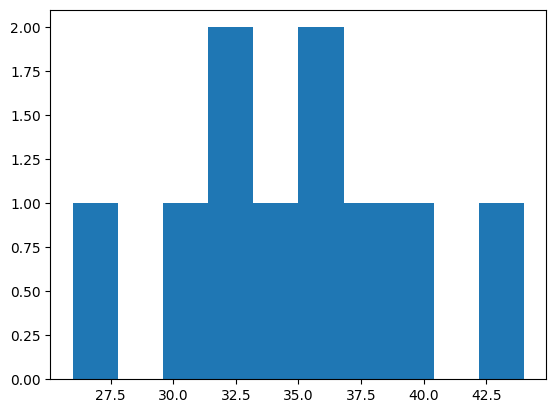

In [39]:
# 현재 작업 파일 내부에 차트 출력
%matplotlib inline
import matplotlib.pyplot as plt



# 엑셀 파일 로딩
dfExcel = pd.read_excel("demo.xlsx", "Sheet1")
# 피규어(그림판)
fig = plt.figure()
# 차트 추가
ax = fig.add_subplot(1,1,1)
# 히스토그램 그리기
ax.hist(dfExcel["나이"], bins=10)
